# 3D test case: Baroclinic Instability

In [247]:
import h5py
import numpy as np
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('classic')
%matplotlib inline

import converter
from importlib import reload
reload(converter)

import utils
reload(utils)

<module 'utils' from '/home/ray/git-projects/RKLM_Reference/visualiser_debugger/utils.py'>

In [248]:
#####################################################
#
# Time labels for C and Python
#
def get_time(t_label, tag):
    label = t_label + '_' + tag
    return label
#
#####################################################

#####################################################
#
# C-output folder names
#
base_suffix = '_baroclinic_instability_periodic/'
# 
#####################################################
#
# and its filename
#
# py_filename = "output_acoustic_wave_high_low_mach_gravity_comp.h5"
# py_filename = "output_internal_long_wave_low_mach_gravity_comp.h5"
# py_filename = "output_travelling_vortex_3d_48_low_mach_gravity_comp.h5"

#####################################################

figsize_tuple = (12,3)

In [249]:
base_folder_name = "../RKLM_Reference/output"

base_path = base_folder_name + base_suffix
folder_comp = "low_Mach_gravity_comp/"
folder_psinc = "low_Mach_gravity_psinc/"

# Manually list the folder names for each directory
directories = ['rho']
directories += ['S']
directories += ['T']
directories += ['Y']
directories += ['buoy']
directories += ['dT'] 
directories += ['dY']
directories += ['dp2_c']
directories += ['dp2_nodes']
directories += ['dpdim']
directories += ['drhoY'] 
directories += ['p']
directories += ['p2_c']
directories += ['p2_nodes']
directories += ['u']
directories += ['v']
directories += ['w']
directories += ['vortz']
directories += ['rhoY']
directories += ['rhoe']
directories += ['rhou']
directories += ['rhov']
directories += ['rhow']
directories += ['rhs']
directories += ['buoy']
if tag == 'before_advect':
    directories += ['rhoYu', 'rhoYv']
if tag == 'after_ebnaimp' or tag == 'after_full_step':
    directories += ['wplusx', 'wplusy', 'wplusz', 'hcenter', 'rhs_nodes', 'p2_full']
    
# And manually list the file names.
filenames = ['rho']
filenames += ['S'] 
filenames += ['T']
filenames += ['Y']
filenames += ['buoy']
filenames += ['dT']
filenames += ['dY']
filenames += ['dp2_c']
filenames += ['dp2_n']
filenames += ['dpdim']
filenames += ['drhoY'] 
filenames += ['p']
filenames += ['p2_c']
filenames += ['p2_n']
filenames += ['u']
filenames += ['v']
filenames += ['w']
filenames += ['vortz']
filenames += ['rhoY']
filenames += ['rhoe']
filenames += ['rhou']
filenames += ['rhov']
filenames += ['rhow']
filenames += ['rhs']
filenames += ['buoy']
if tag == 'before_advect':
    filenames += ['rhoYu', 'rhoYv']
if tag == 'after_ebnaimp' or tag == 'after_full_step':
    filenames += ['wplusx', 'wplusy', 'wplusz', 'hcenter', 'rhs_nodes', 'p2_full']

In [250]:
# manually specific folder names
test_cases_folders = ['p2_nodes']
test_cases_folders += ['rho']
test_cases_folders += ['rhoY']
test_cases_folders += ['rhoe']
test_cases_folders += ['rhou']
test_cases_folders += ['rhov']
test_cases_folders += ['rhow']
test_cases_folders += ['u']
test_cases_folders += ['v']
test_cases_folders += ['vortz']
test_cases_folders += ['dT'] 
test_cases_folders += ['Y']
test_cases_folders += ['dY']
test_cases_folders += ['buoy']
if tag == 'before_advect':
    test_cases_folders += ['rhoYu', 'rhoYv']
if tag == 'after_ebnaimp' or tag == 'after_full_step':
    test_cases_folders += ['wplusx', 'wplusy', 'wplusz', 'hcenter', 'rhs_nodes', 'p2_full']

# and filenames
test_cases_names = ['p2_n']
test_cases_names += ['rho']
test_cases_names += ['rhoY']
test_cases_names += ['rhoe']
test_cases_names += ['rhou']
test_cases_names += ['rhov']
test_cases_names += ['rhow']
test_cases_names += ['u']
test_cases_names += ['v']
test_cases_names += ['vortz']
test_cases_names += ['dT']
test_cases_names += ['Y']
test_cases_names += ['dY']
test_cases_names += ['buoy']
if tag == 'before_advect':
    test_cases_names += ['rhoYu', 'rhoYv']
if tag == 'after_ebnaimp' or tag == 'after_full_step':
    test_cases_names += ['wplusx', 'wplusy', 'wplusz', 'hcenter', 'rhs_nodes', 'p2_full']

../output_baroclinic_instability_periodic/output_baroclinic_instability_periodic_ensemble=1_65_33_65_25.0.h5
(69, 37, 69)
(69, 37, 69)
0


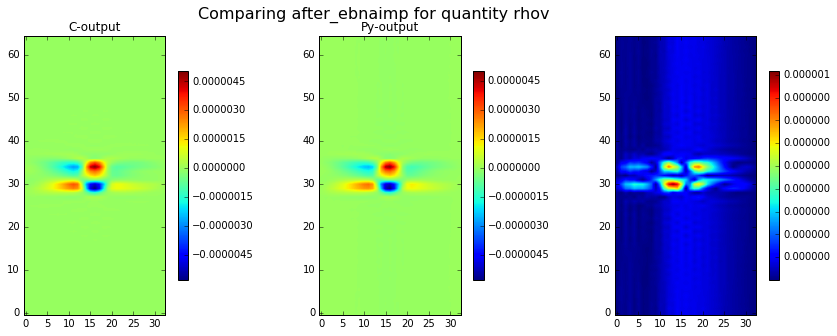

1


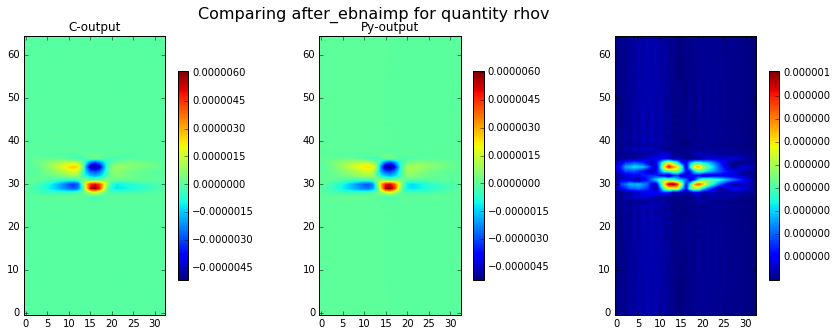

2


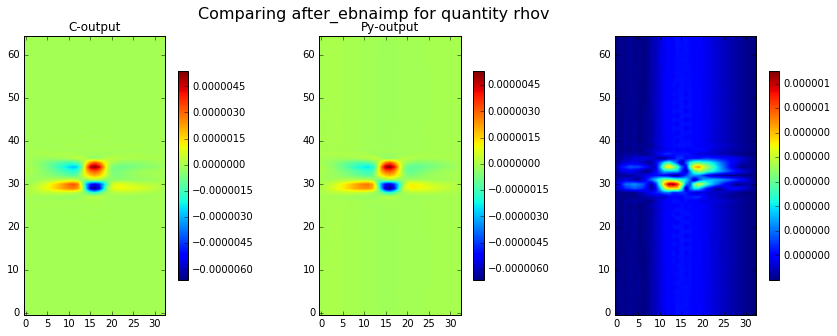

3


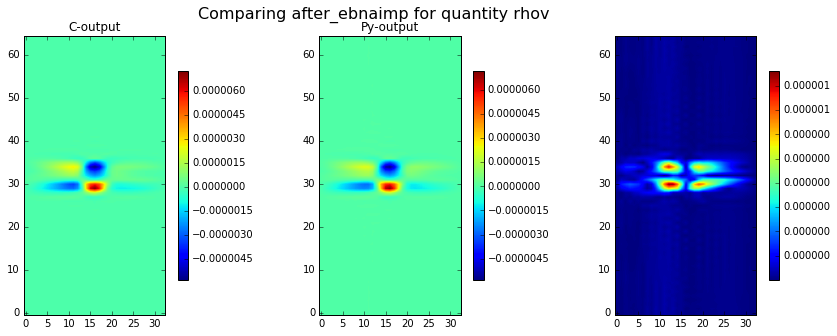

4


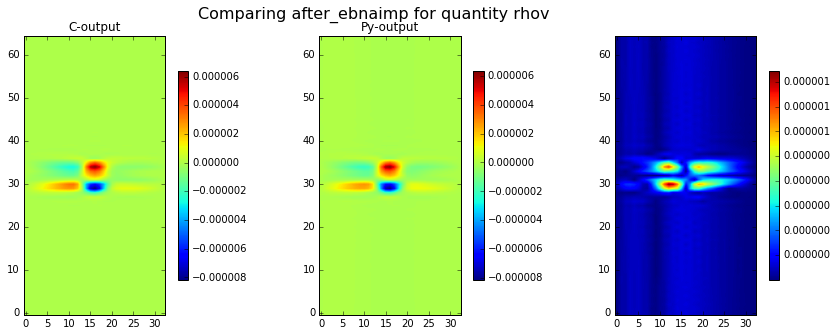

5


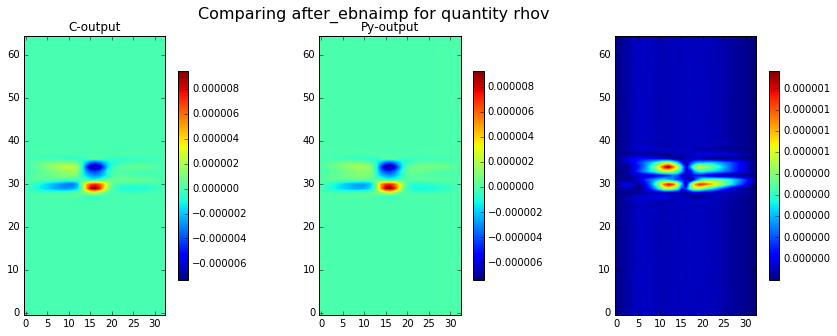

6


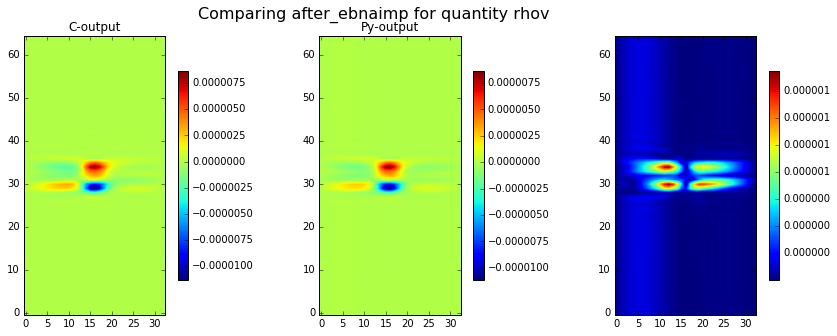

7


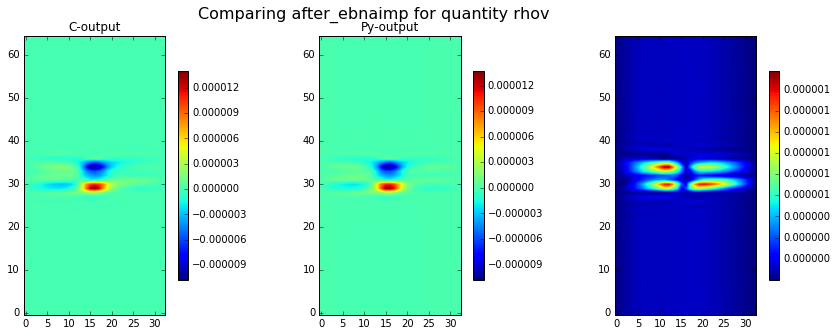

8


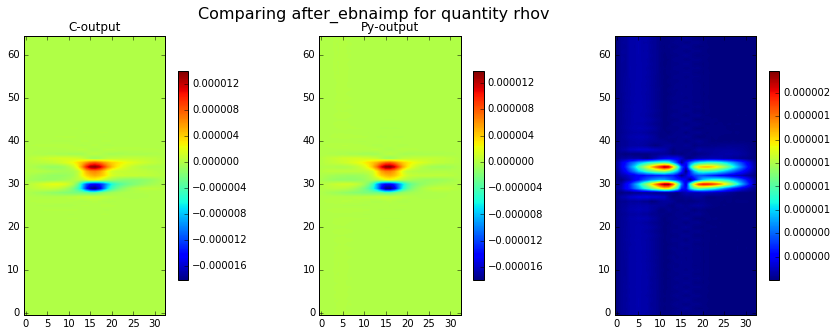

9


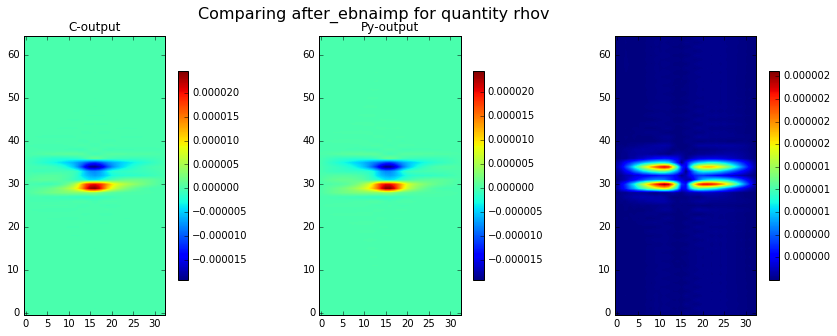

10


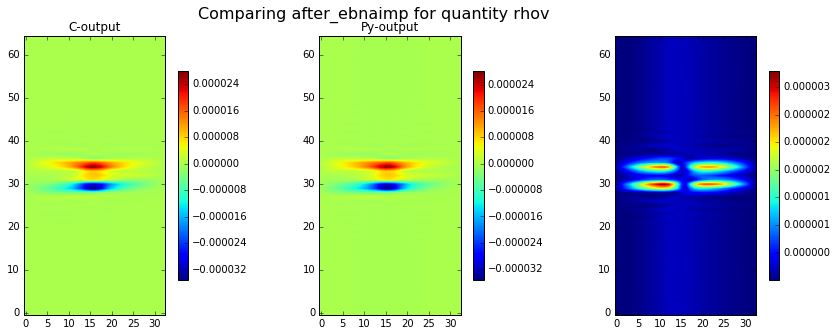

11


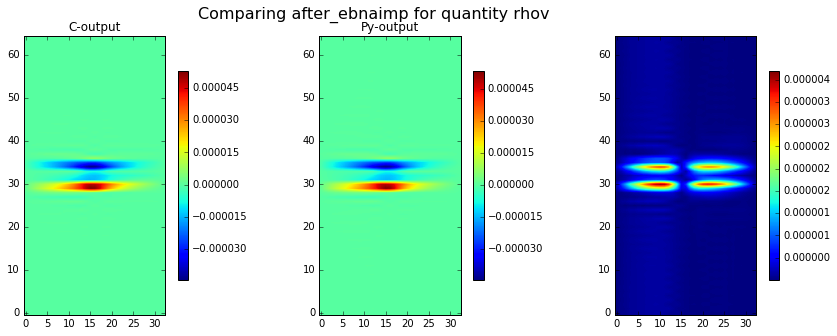

12


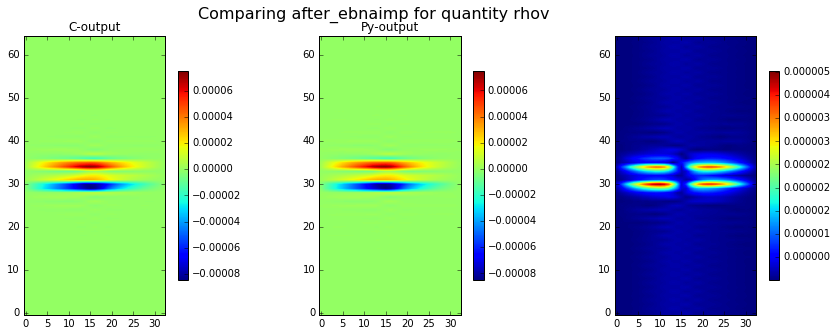

13


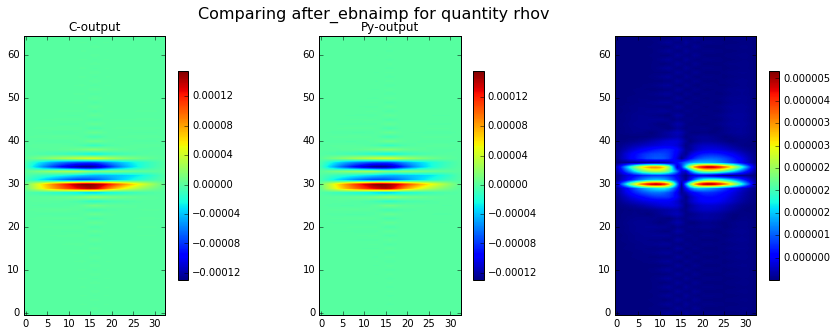

14


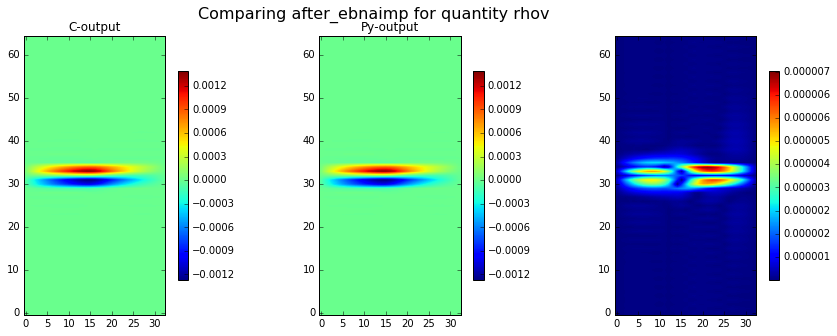

15


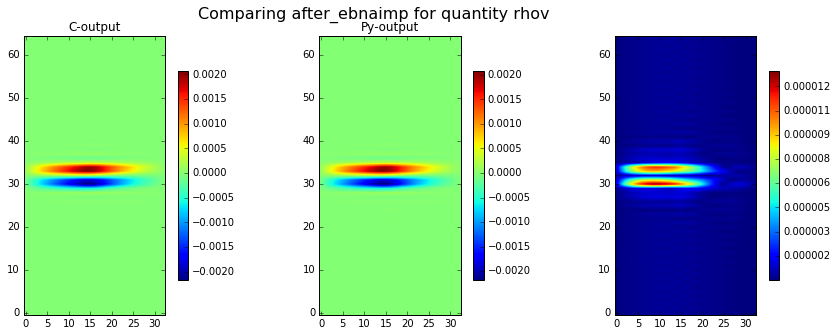

16


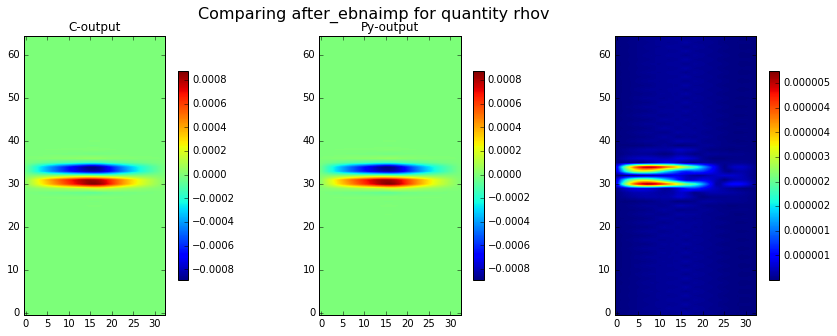

17


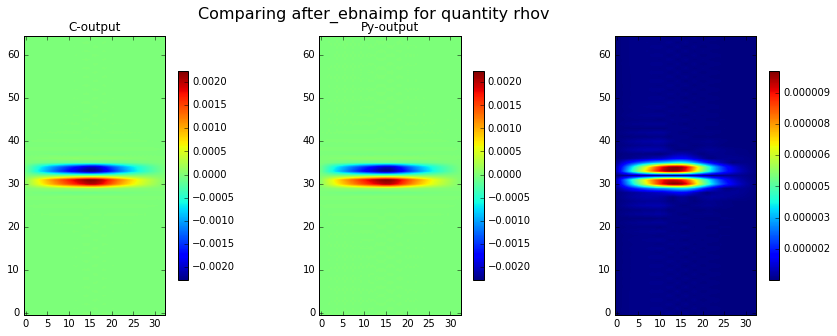

18


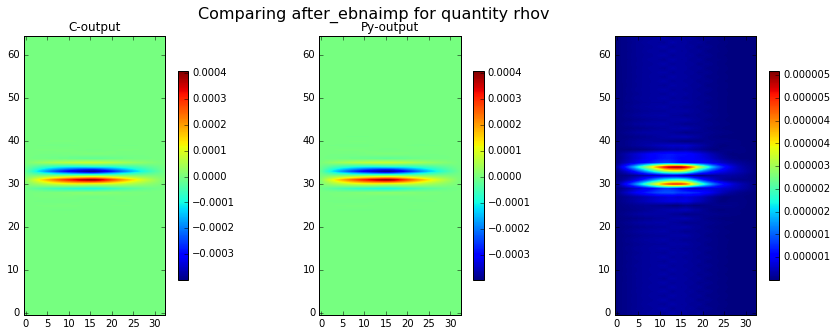

19


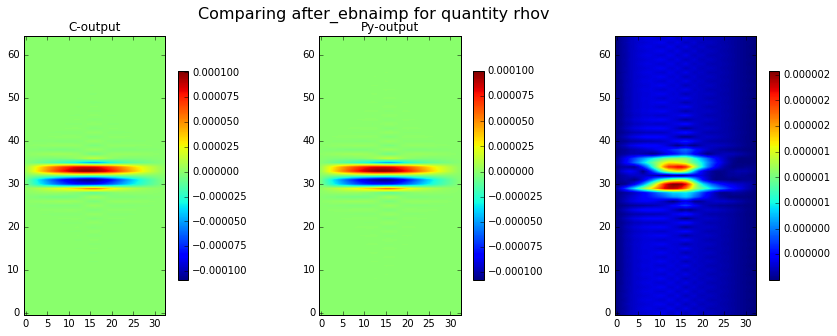

20


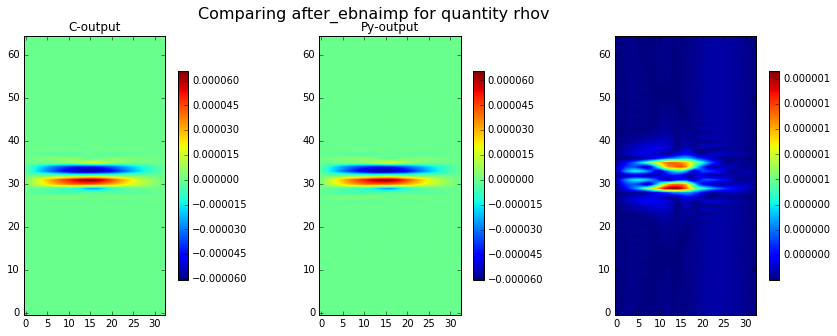

21


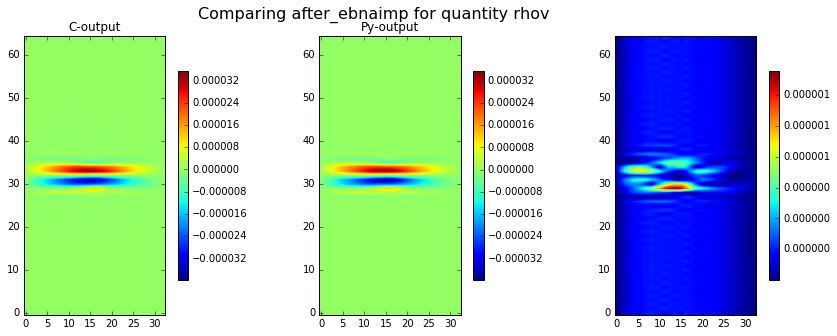

22


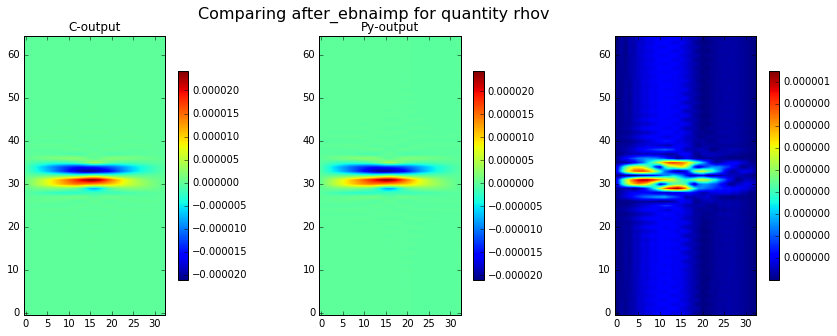

23


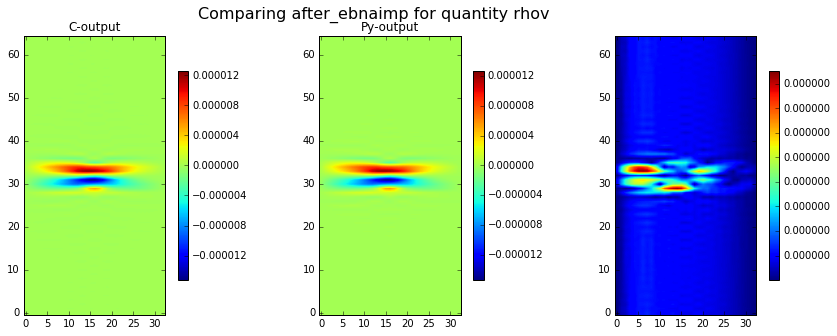

24


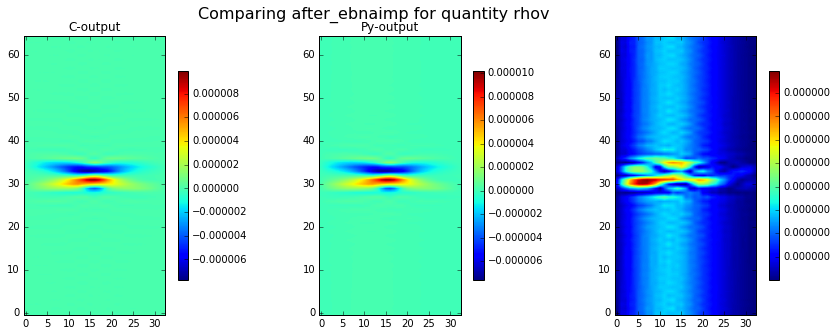

25


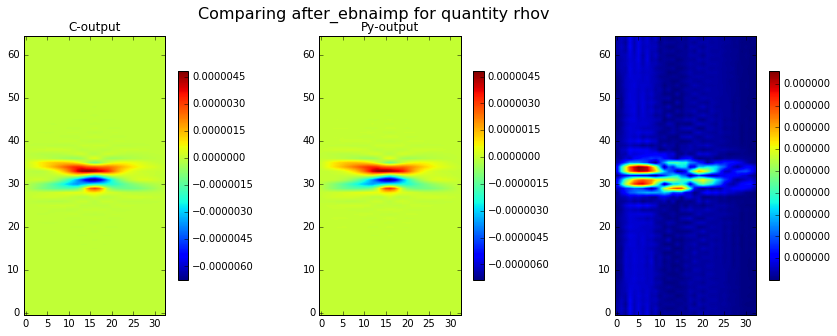

26


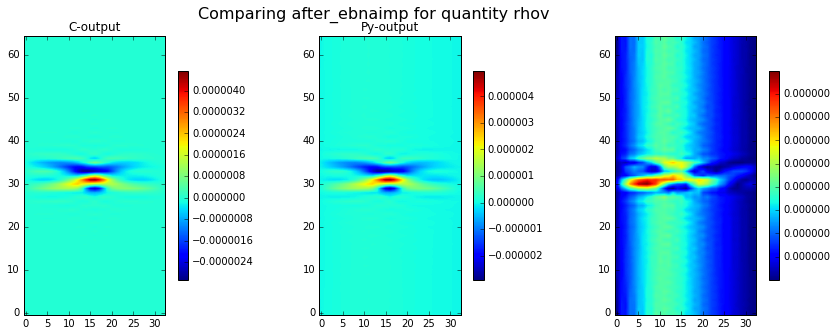

27


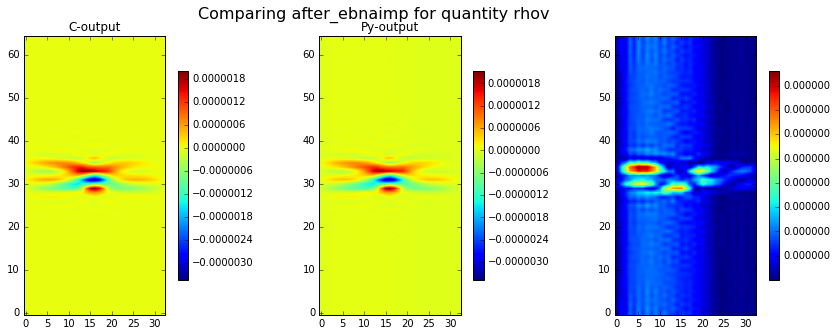

28


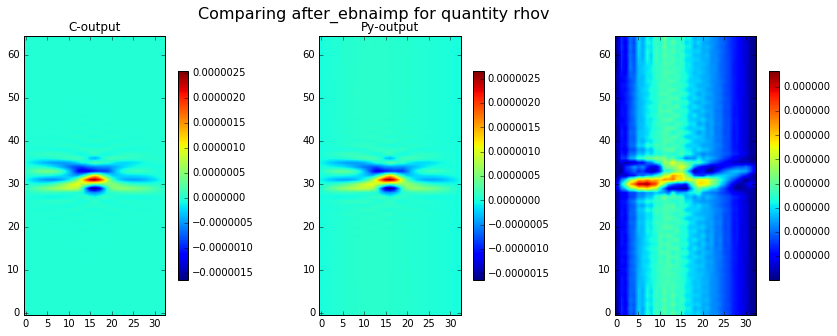

29


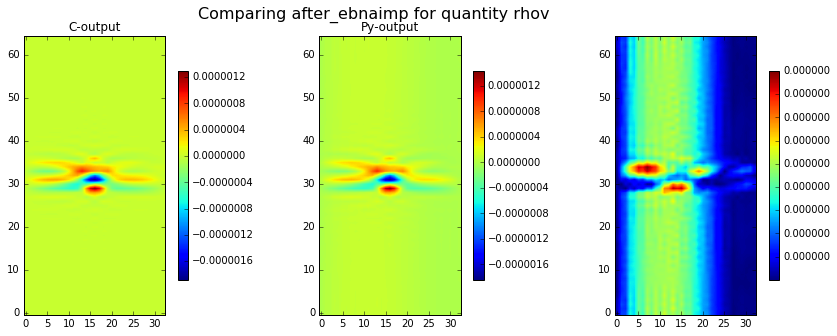

30


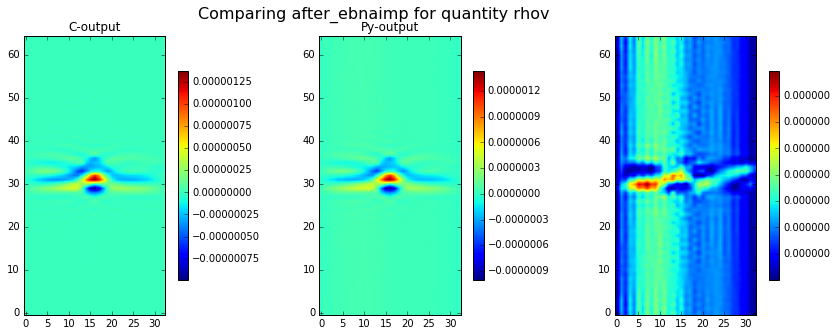

31


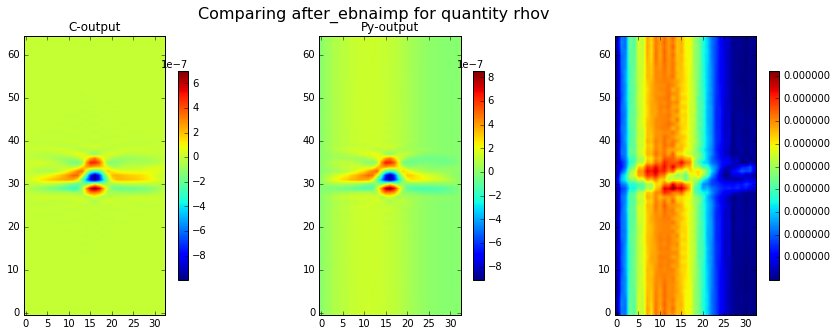

32


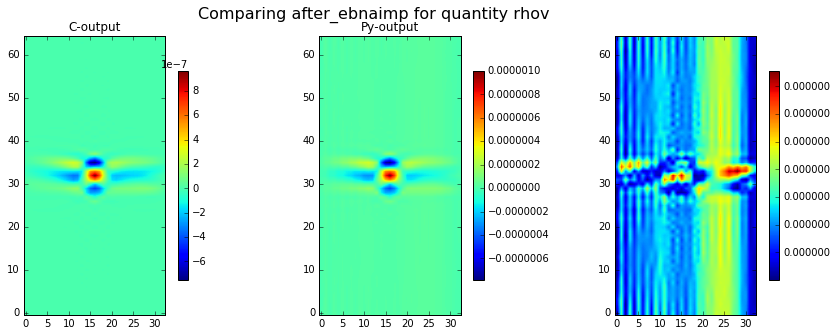

33


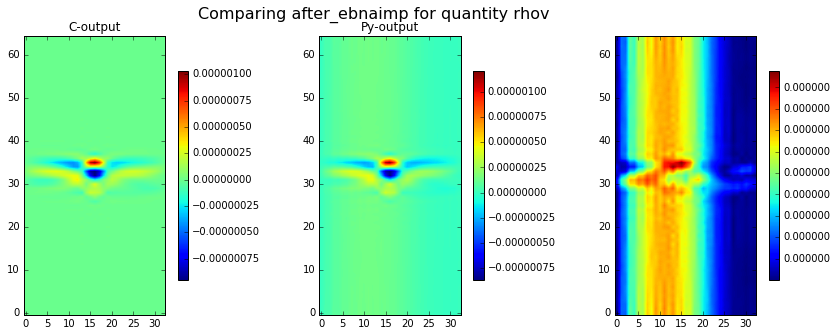

34


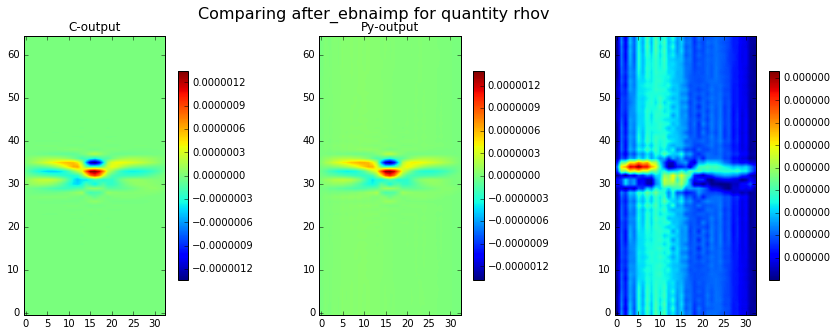

35


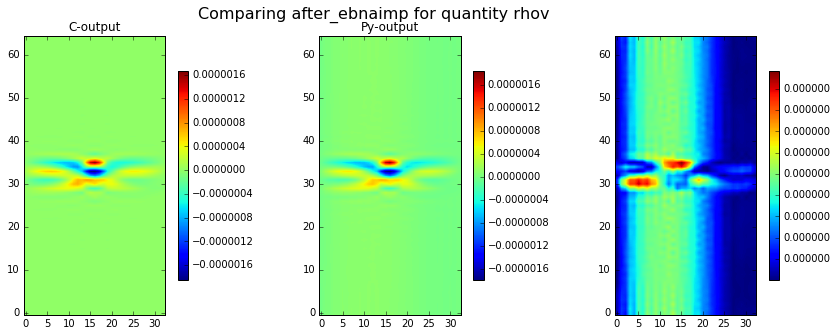

36


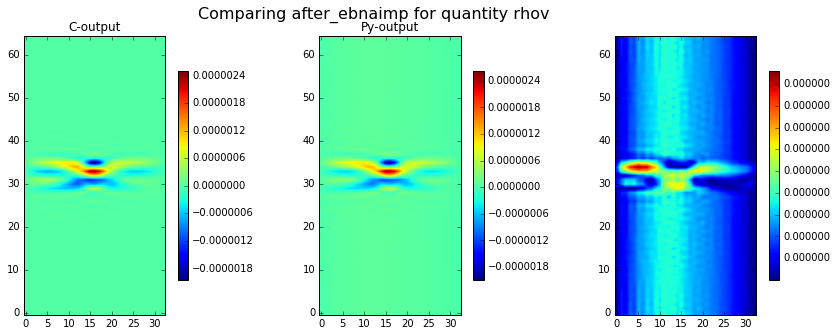

37


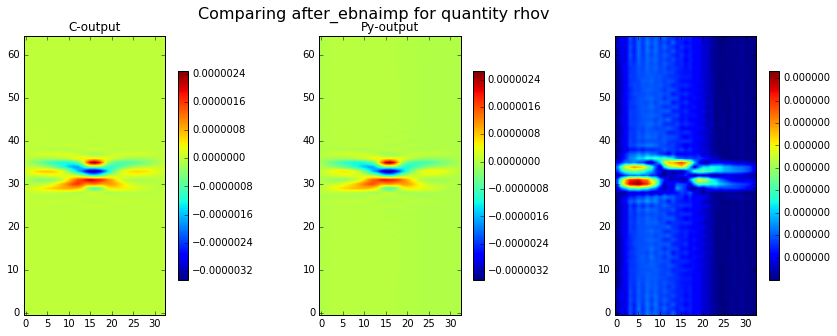

38


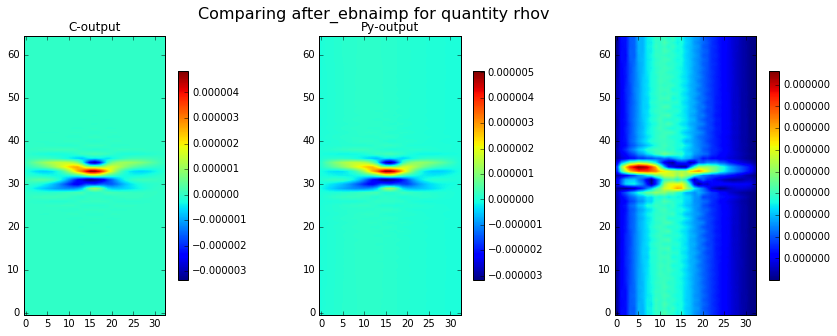

39


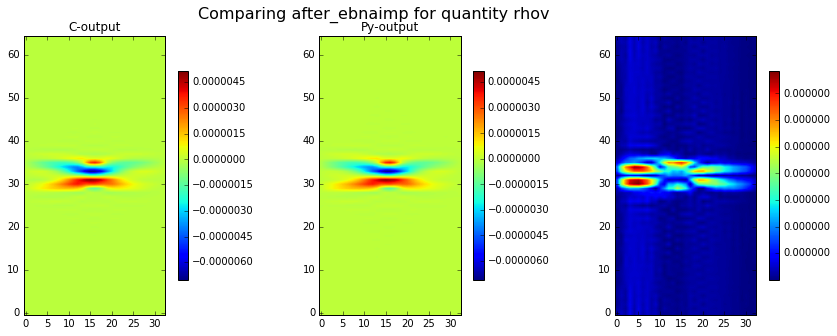

40


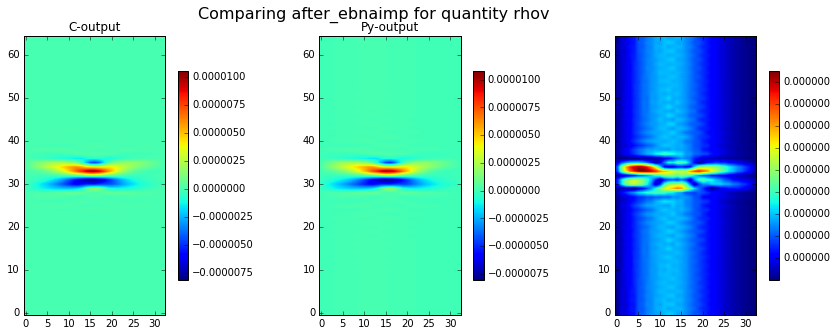

41


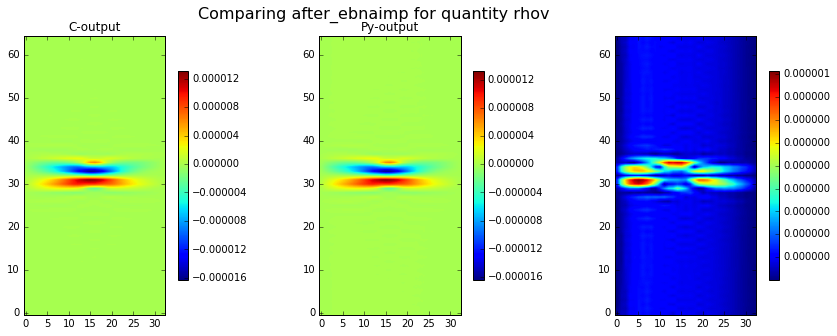

42


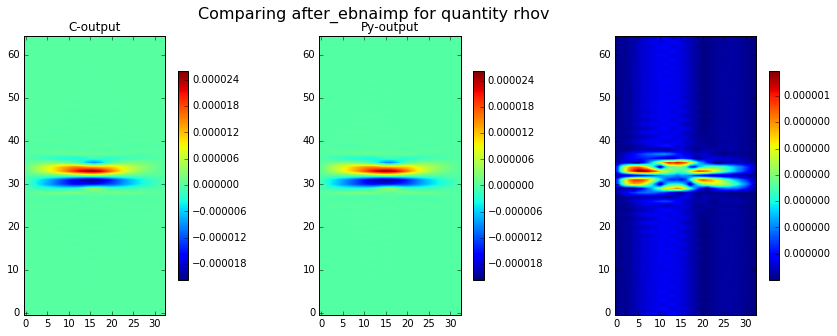

43


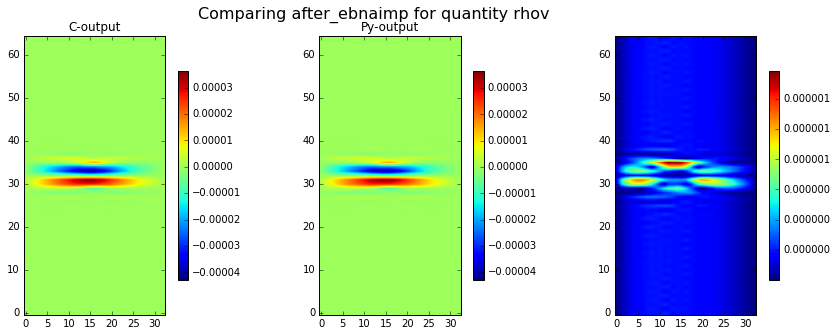

44


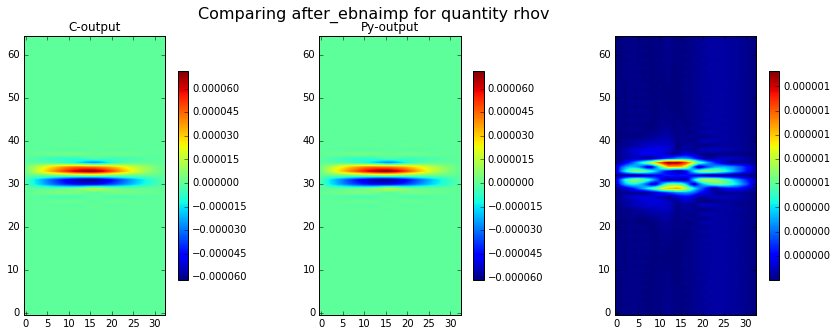

45


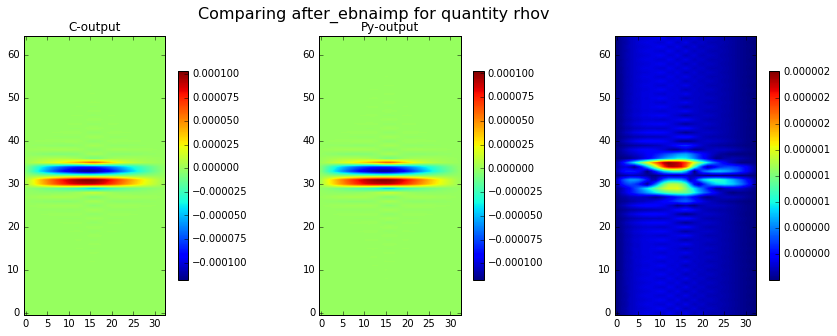

46


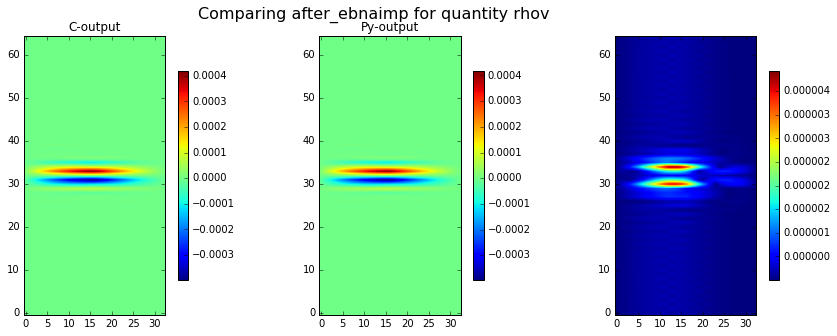

47


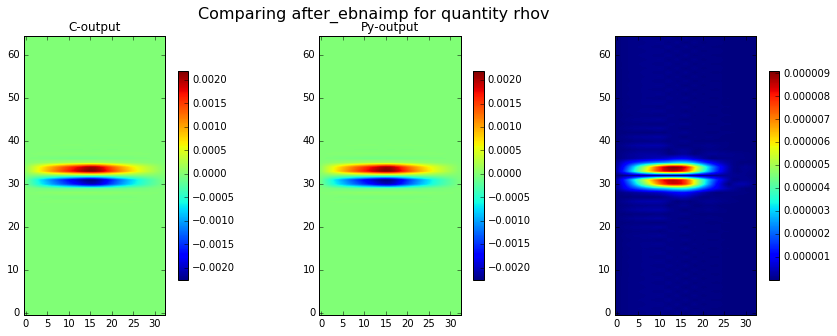

48


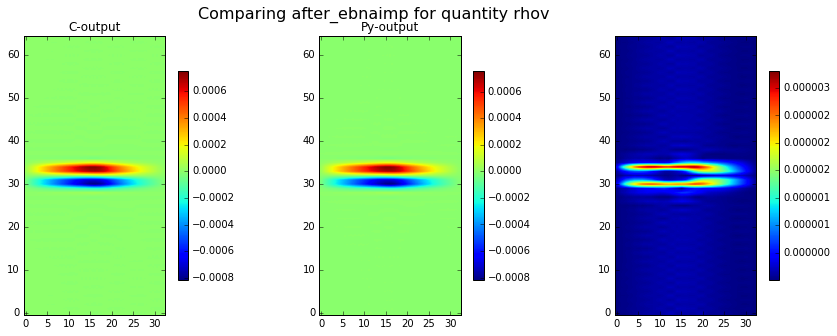

49


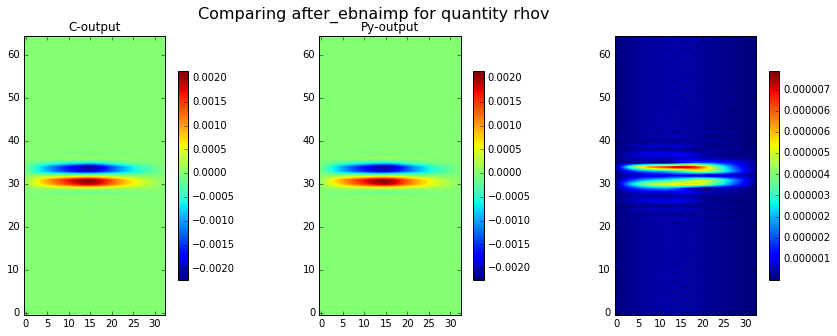

50


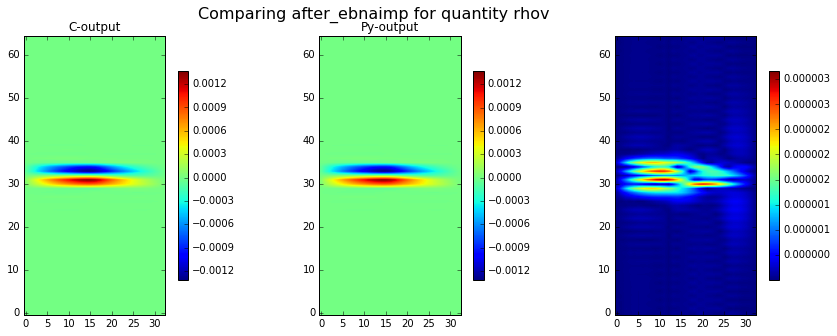

51


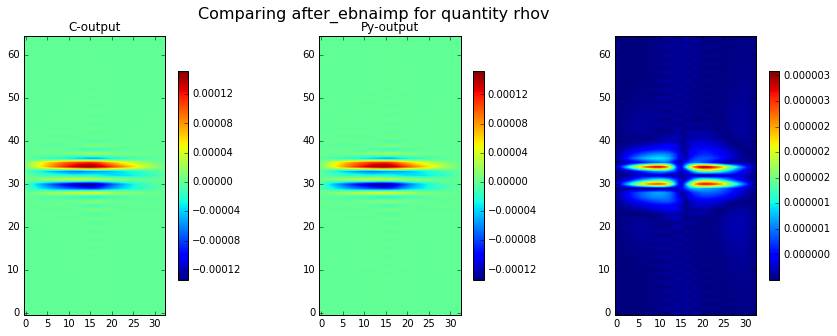

52


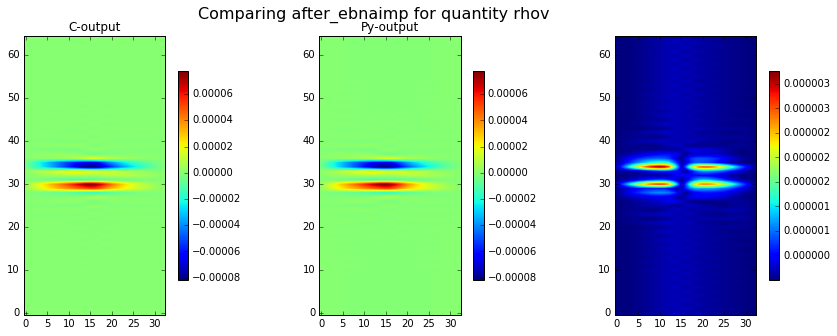

53


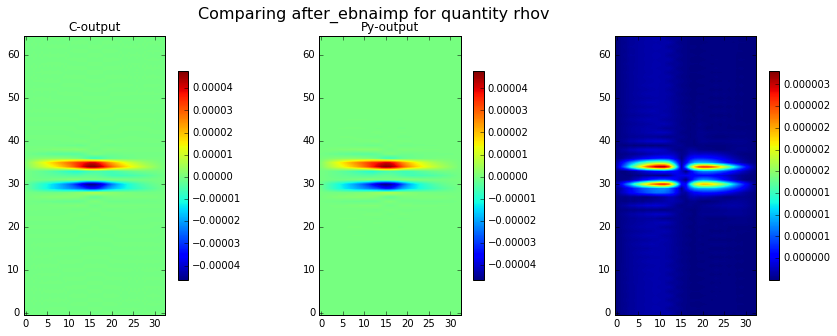

54


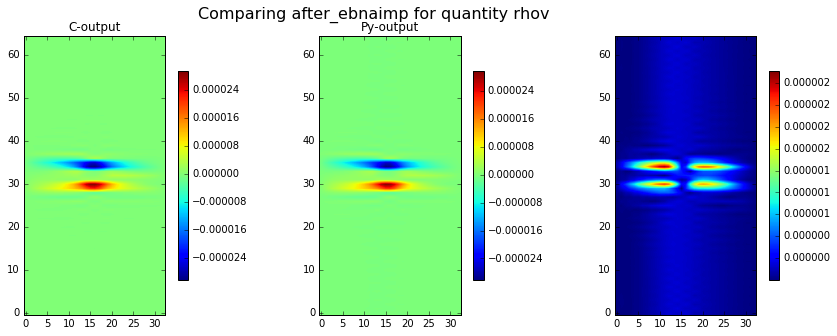

55


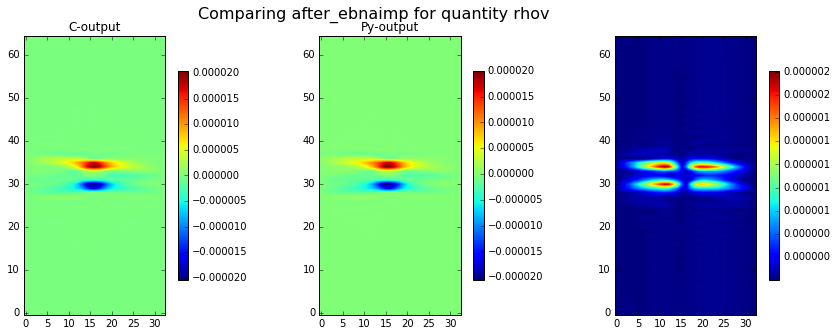

56


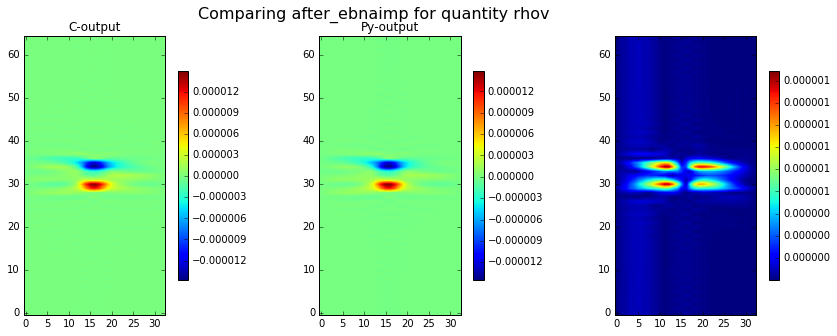

57


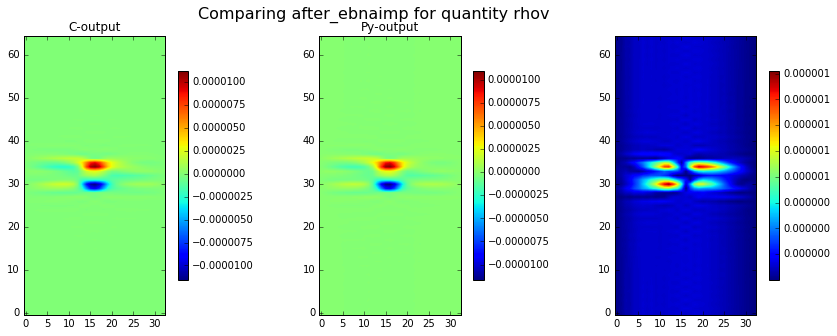

58


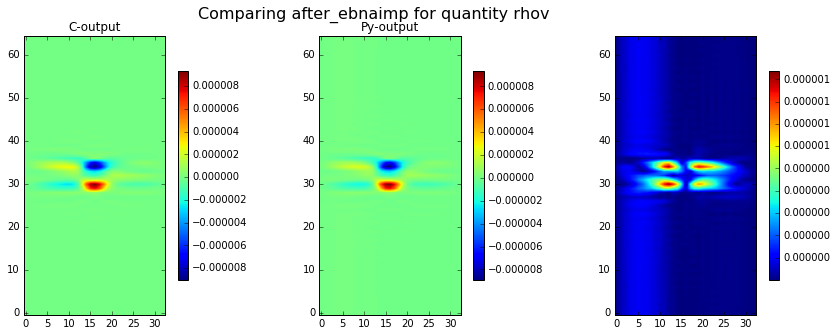

59


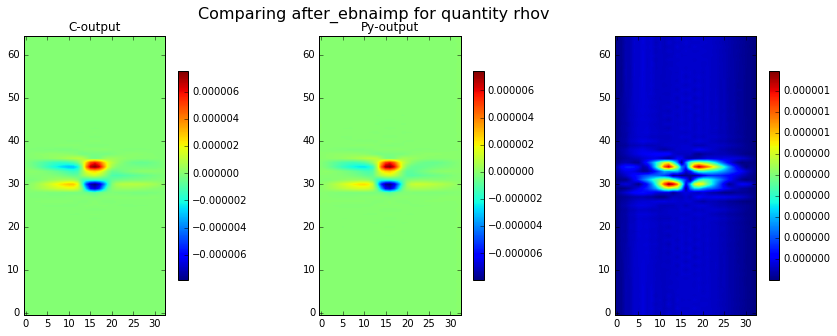

60


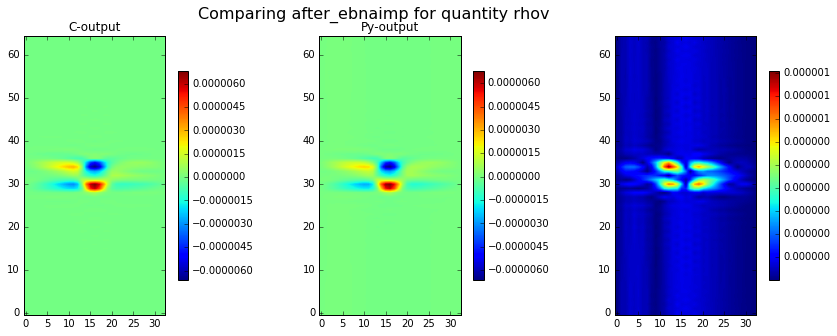

61


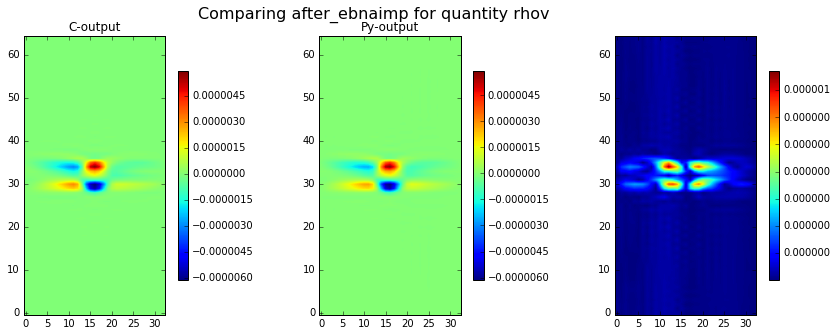

62


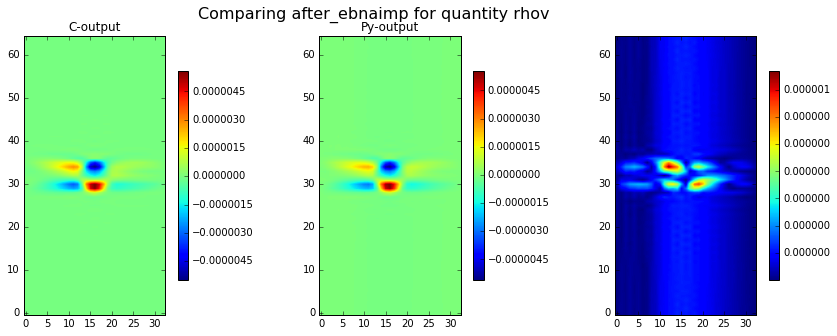

63


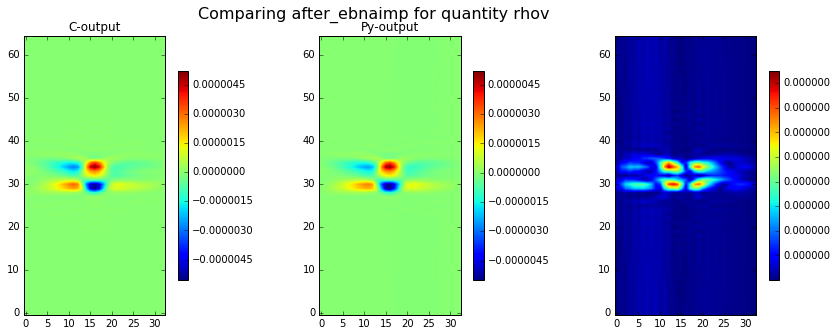

64


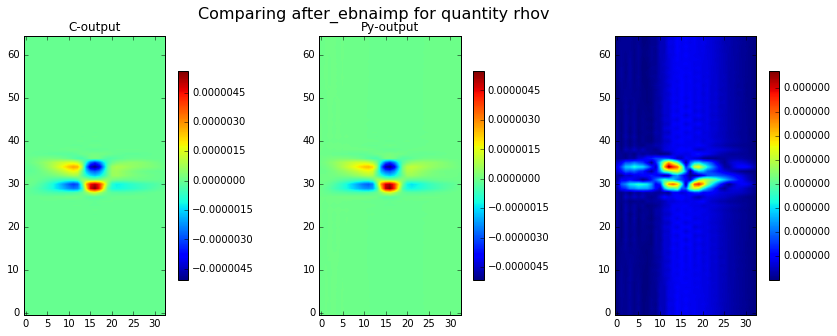

65


TypeError: Invalid shape (65, 33, 0) for image data

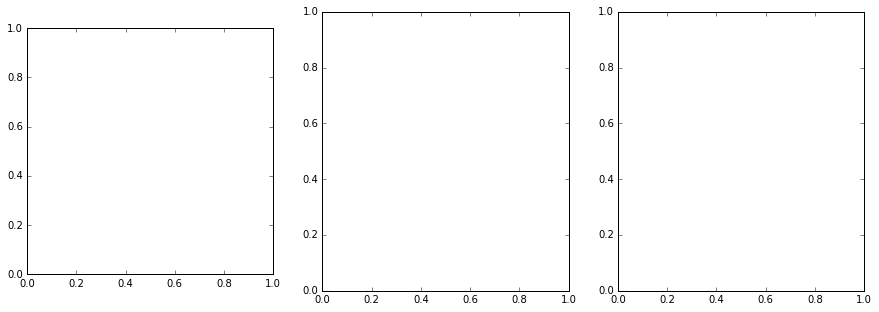

In [252]:
t_label = '000'

tag = 'ic'
# tag = 'before_advect'
# tag = 'after_advect'
# tag = 'after_ebnaexp'
tag = 'after_ebnaimp'
# tag = 'after_half_step'
# tag = 'after_efna'
# tag = 'after_full_advect'
# tag = 'after_full_ebnaexp'
# tag = 'after_full_step'

time = get_time(t_label, tag)


converter_obj = converter.convert(base_path,folder_comp,time,t_label)
converter_obj.convert_files(directories,filenames)
c = converter_obj.get_converted_files(test_cases_folders, test_cases_names)

# print(c.Y[10])
# plt.figure()
# print(c_arr.shape)
# plt.imshow(c_arr[:,19,:].T, origin='lower')
# plt.colorbar(fraction=0.04, pad=0.04)
# plt.show()

py_basename = "output_baroclinic_instability_periodic"
py_directory = "../%s/" %py_basename

ens_size = 1
grid_x = 65
grid_y = 33
grid_z = 65
end_time = 25.0
suffix = ""

filename = utils.get_filename(py_basename,grid_x,grid_y,ens_size,end_time,suffix,grid_z)
path = utils.get_path(py_directory, filename)

print(path)

attribute = 'p2_nodes'
# attribute = 'rho'
# attribute = 'buoy'
# attribute = 'rhou'
attribute = 'rhov'
# attribute = 'rhow'
# attribute = 'rhoY'
# attribute = 'rhs_nodes'
# attribute = 'wplusx'
# attribute = 'wplusy'
# attribute = 'wplusz'
# attribute = 'hcenter'
# attribute = 'rhoY'
# attribute = 'rhoYu'
# attribute = 'rhoYv'
# attribute = 'p2_full'

output_image = True
# attributes = ['wplusx', 'wplusy', 'wplusz', 'rhs_nodes', 'p2_full']
# cn = [False,False,False,True,True]

py_nodes = True
c_nodes = True
n2e = (slice(0,-1),slice(0,-1),slice(0,-1))
py_arr = utils.ensemble_test_case(0, path, ens_size, attribute, tag)#[:,:5,:]
# py_rhoY = utils.ensemble_test_case(0, path, ens_size, 'rhoY', tag)#[:,:5,:]

if py_nodes == True and c_nodes == False: py_arr = py_arr[n2e]
# print(py_arr.shape)
# py_arr = np.swapaxes(py_arr,-1,1)

# attribute = 'rhou'
# py_arr0 = utils.ensemble_test_case(0, path, ens_size, attribute, 'ic')

# attribute = 'rho'
# py_arr1 = utils.ensemble_test_case(0, path, ens_size, attribute, 'ic')

# py_arr = py_arr0 / py_arr1

c_arr = getattr(c,attribute)[...]#[:,:5,:]

slc = (slice(None,),slice(None,),slice(None,))
# slc = (slice(2,-2),slice(2,-2),slice(2,-2))
# slc = (slice(3,-3),slice(3,-3),slice(3,-3))

py_arr = py_arr[slc]
c_arr = c_arr[slc]

# HydroState_S0 = [1.0098665382932777,1.0032780884916337,1.0990920476146133,1.092485128615045,1.0859570593651622,1.079500814746869,1.0731117649199655,1.0667956130736393,1.060557838596218,1.0544026790354297,1.048320108707329,1.042306527373983,1.0363519800491314,1.0304601315241868,1.0246362553344148,1.00152454386811,0.9750789149933252,0.9495201563207443,0.9248168935805458,0.8978174993338901,0.8712803917513775,0.8456842729804314,0.8209975448937014,0.7971954950740564,0.7742507576028154,0.7521366424442341,0.7308275338837824,0.7102987701531605,0.6905265399681664,0.6714877944812714,0.6531601731838993,0.6355219423344217,0.6185519445300829,0.6022295580923691,0.5865346649939082,0.8031026602851968,0.797863154506745]
# HydroState_S0 = np.array(HydroState_S0)

# sc = py_arr.shape
# for dim in range(0,3,2):
#     HydroState_S0 = np.expand_dims(HydroState_S0, dim)
#     HydroState_S0 = np.repeat(HydroState_S0, sc[dim], axis=dim)
    
# py_arr += py_rhoY * HydroState_S0

print(c_arr.shape)
print(py_arr.shape)
# c_arr = c.rho
# c_arr = c.rhoY
# c_arr = c.rhou[:] / c.rho[:]
# slice_idx_y = slice(10,20)

start=0
if output_image == True:
    for i in range(start+0,69):
        slice_x = slice(0,69)
        slice_y = slice(0,69)
        slice_z = slice(0,69)
        print(i)
        slice_z = slice(i,i+1)
    #     slice_z = slice(0,69)
        slice_idx = (slice_x,slice_y,slice_z)

        inner = (slice(2,-2),slice(2,-2),slice(2,-2))
#         inner = (slice(None,),slice(None,),slice(None,))
        # inner = (slice(None,),slice(None,),slice(0,-2))
#         inner = (slice(None,),slice(None,),slice(None,))
        # inner = (slice(2,),slice(None,),slice(None,))

        c_im = c_arr[inner][slice_idx].squeeze()
        py_im = py_arr[inner][slice_idx].squeeze()

        fig, ax = plt.subplots(ncols=3, figsize=(15,5))
        im0 = ax[0].imshow(c_im, origin='lower')
        ax[0].set_title("C-output")
        im1 = ax[1].imshow(py_im, origin='lower')
        fig.colorbar(im0,ax=ax[0],shrink=.75)
        ax[1].set_title("Py-output")
        fig.colorbar(im1,ax=ax[1],shrink=.75)
        diff_arr = np.abs(c_im - py_im)
        im2 = ax[2].imshow(diff_arr, origin='lower')
    #     print(diff_arr.max())
        # ax[2].set_title("abs. diff. between outputs")
        fig.colorbar(im2,ax=ax[2],shrink=.75, format='%.6f')
        fig.suptitle(r'Comparing %s for quantity %s' %(tag,attribute), fontsize='16')
        plt.show()
else:
    cnt = 0
    for att in attributes:
        py_arr = utils.ensemble_test_case(0, path, ens_size, att, tag)
        c_nodes = cn[cnt]
        if py_nodes == True and c_nodes == False: py_arr = py_arr[n2e]

        c_arr = getattr(c,att)[...]
        py_arr = py_arr[slc]
        c_arr = c_arr[slc]
        
        print((py_arr - c_arr).sum())
        
        cnt += 1

In [ ]:
py_basename = "output_baroclinic_instability_periodic"
py_directory = "../%s/" %py_basename

ens_size = 1
grid_x = 65
grid_y = 33
grid_z = 65
end_time = 25.0
suffix = ""

filename = utils.get_filename(py_basename,grid_x,grid_y,ens_size,end_time,suffix,grid_z)
path = utils.get_path(py_directory, filename)

print(path)

attribute = 'p2_nodes'
attribute = 'rho'
attribute = 'rhoYu'
tag = 'before_advect'
py_arr = utils.ensemble_test_case(0, path, ens_size, attribute, tag)

print(py_arr.shape)

slice_x = slice(0,69)
slice_y = slice(0,69)
i = 30
slice_z = slice(i,i+1)
slice_idx = (slice_x,slice_y,slice_z)

inner = (slice(None,),slice(None,),slice(None,))

py_im = py_arr[inner][slice_idx].squeeze()

fig = plt.figure()
plt.imshow(py_im)
plt.colorbar()
plt.show()